In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('GOOGL.csv')
data = df['Close'].values.reshape(-1, 1)  
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [3]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [4]:
sequence_length = 20
X, y = create_sequences(scaled_data, sequence_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [5]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

C:\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.5557e-04 - val_loss: 5.5224e-04
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.0383e-04 - val_loss: 9.9729e-04
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.8414e-04 - val_loss: 3.7114e-04
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.4311e-04 - val_loss: 7.1787e-04
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.4770e-04 - val_loss: 4.6533e-04
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.3942e-04 - val_loss: 6.4859e-04
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.0984e-04 - val_loss: 5.0097e-04
Epoch 9/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.0668e-04 - val_loss: 4.7157e-04
Epoch 10/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.0881e-04 - val_loss: 7.5790e-04


In [7]:
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8979e-04
Test Loss: 0.0007579022203572094
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


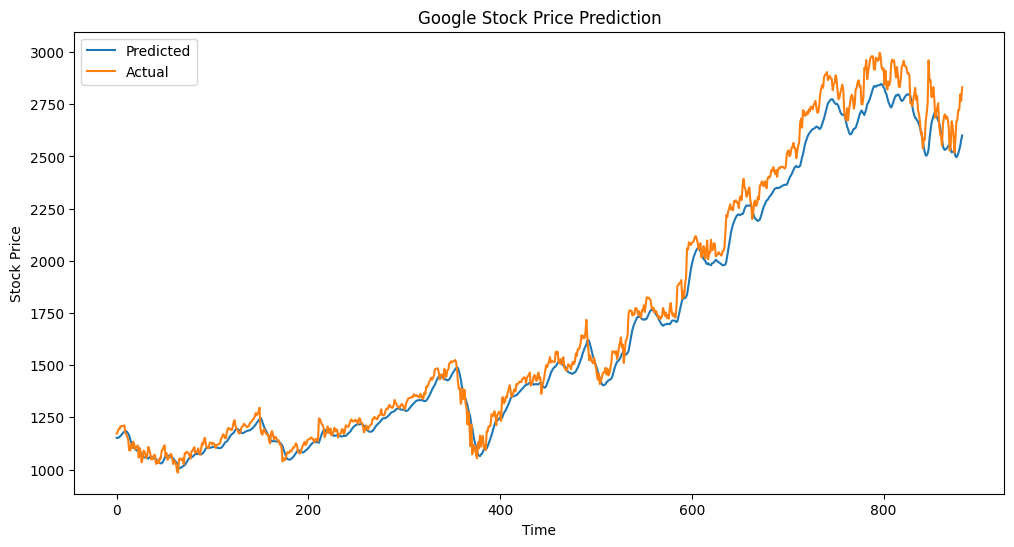

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()